In [58]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
states = gpd.read_file("./cb_2018_us_state_500k/cb_2018_us_state_500k.shp") # Path to the shapefile
print(states["NAME"]) # print out state names

0                                      Mississippi
1                                   North Carolina
2                                         Oklahoma
3                                         Virginia
4                                    West Virginia
5                                        Louisiana
6                                         Michigan
7                                    Massachusetts
8                                            Idaho
9                                          Florida
10                                        Nebraska
11                                      Washington
12                                      New Mexico
13                                     Puerto Rico
14                                    South Dakota
15                                           Texas
16                                      California
17                                         Alabama
18                                         Georgia
19                             

In [60]:
# remove territories, etc.
remove_states = ["Puerto Rico",
                 "District of Columbia",
                 "American Samoa",
                 "United States Virgin Islands",
                 "Guam",
                 "Commonwealth of the Northern Mariana Islands",
                ]

# create new df of just states
just_states = states[~states["NAME"].isin(remove_states)].reset_index()

just_states

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [61]:
# separate single and multipolygon states
single_states = ["Oklahoma",
                 "West Virginia",
                 "Idaho",
                 "Nebraska",
                 "New Mexico",
                 "South Dakota",
                 "Pennsylvania",
                 "Missouri",
                 "Colorado",
                 "Utah",
                 "Tennessee",
                 "Wyoming",
                 "Kansas",
                 "Nevada",
                 "Illinois",
                 "Vermont",
                 "Montana",
                 "Iowa",
                 "Arizona",
                 "New Jersey",
                 "North Dakota",
                 "Arkansas",
                 "Indiana"]

multi_states = ["Mississippi",
                "North Carolina",
                "Virginia",
                "Louisiana",
                "Michigan",
                "Massachusetts",
                "Florida",
                "Washington",
                "Texas",
                "California",
                "Alabama",
                "Georgia",
                "New York",
                #"Alaska",
                "South Carolina",
                "New Hampshire",
                "Maryland",
                "Maine",
                #"Hawaii",
                "Delaware",
                "Rhode Island",
                "Kentucky",
                "Ohio",
                "Wisconsin",
                "Oregon",
                "Minnesota",
                "Connecticut"]

# Polygon

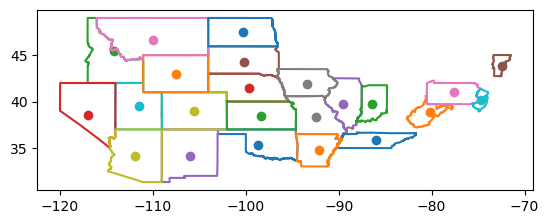

In [62]:
state_names_s = [] # lists to store data from single polygon states
state_coords_s = []
state_centroids_s = []

for s in single_states:

    curr_state=s # select current state
    curr_coords = just_states[just_states["NAME"]==curr_state].get_coordinates() # get coordinates as dataframe
    curr_coord_list = [list(curr_coords["x"]), list(curr_coords["y"])] # convert to list of lists
    
    # get centroid
    cen_x_val = (min(curr_coord_list[0])+max(curr_coord_list[0]))/2
    cen_y_val = (min(curr_coord_list[1])+max(curr_coord_list[1]))/2
    curr_centroid = [cen_x_val, cen_y_val]

    # save data
    state_names_s.append(curr_state)
    state_coords_s.append(curr_coord_list)
    state_centroids_s.append(curr_centroid)
    
    # check plot
    plt.plot(curr_coord_list[0], curr_coord_list[1])
    plt.scatter(curr_centroid[0], curr_centroid[1])
    plt.gca().set_aspect("equal")

# Multipolygon

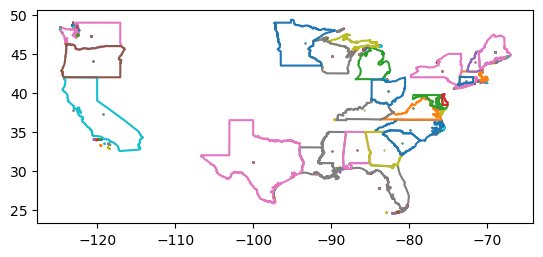

In [63]:
state_names_m = [] # lists to store data from multipolygon states
state_coords_m = []
state_centroids_m = []

for m in multi_states:

    curr_state=m # select current state
    curr_df = just_states[just_states["NAME"]==curr_state] # get coordinates as dataframe
    
    # expand polygons
    polys = (
        gpd.GeoSeries(
            curr_df.dropna()["geometry"].apply(lambda g: g.geoms).explode()
        )
        .reset_index(drop=True)
    )
    
    # get coordinates for each polygon
    curr_coords = []
    for geom in polys:
        curr_coords.append(list(geom.exterior.coords))
    
    # unzip coordinates and create list of list of coordinates
    curr_coord_list = []
    for i in range(len(curr_coords)):
        unzipped_coord = list(zip(*curr_coords[i]))
        unzipped_list = [list(unzipped_coord)[0],list(unzipped_coord)[1]]
        curr_coord_list.append(unzipped_list)
    
    # calcualte the centroid of bounding box
    cen_x_vals = []
    cen_y_vals = []
    for i in range(len(curr_coord_list)):
        for j in range(len(curr_coord_list[i][0])):
            cen_x_vals.append(curr_coord_list[i][0][j])
        for k in range(len(curr_coord_list[i][1])):
            cen_y_vals.append(curr_coord_list[i][1][k])
    cen_x_val = (min(cen_x_vals)+max(cen_x_vals))/2
    cen_y_val = (min(cen_y_vals)+max(cen_y_vals))/2
    curr_centroid = [cen_x_val, cen_y_val]

    # save data
    state_names_m.append(curr_state)
    state_coords_m.append(curr_coord_list)
    state_centroids_m.append(curr_centroid)
        
    # check plot
    for i in range(len(curr_coord_list)):
        plt.plot(curr_coord_list[i][0], curr_coord_list[i][1])
        plt.scatter(curr_centroid[0], curr_centroid[1], s=0.1)
        plt.gca().set_aspect("equal")


# Area calculations

In [116]:
# read in data
acres = pd.read_csv("./acres_farms_principal_producer_2017.csv")

# remove US data for now
acres = acres.iloc[1:,:]

# get the total acres for each state
acres["total"] = acres["white"]+acres["Latino"]+acres["Indigenous"]+acres["Asian"]+acres["Black"]+acres["PacificIslander"]

# get the max acres amount
max_acres = acres["total"].max()
max_state = acres["state"][acres["total"]==max_acres].item()
max_mi2 = acres["area_mi2"][acres["state"]==max_state].item()

# set scale for each state
acres["acre_scale"] = (acres["total"]/max_acres)
acres["mi2_scale"] = (acres["area_mi2"]/max_mi2)
additional_scale = 0.75 # set additional scale factor
acres["scale"] = (acres["acre_scale"] / acres["mi2_scale"])*additional_scale

acres

,state,area_mi2,white,Latino,Indigenous,Asian,Black,PacificIslander,total,acre_scale,mi2_scale,scale
1,Alabama,52420,8171173,70667,71182,8580,317092,1998,8640692,0.064462,0.195163,0.247723
2,Alaska,665384,528975,2119,321825,276,0,0,853195,0.006365,2.477267,0.001927
3,Arizona,113990,6324718,1348792,20117766,29420,1182,6998,27828876,0.207611,0.424392,0.366897
4,Arkansas,53179,13536820,138310,85718,31162,157803,2273,13952086,0.104086,0.197989,0.394289
5,California,163695,23497022,2136782,364668,639687,63407,175286,26876852,0.200509,0.609447,0.246751
6,Colorado,104094,30842084,1012413,931597,66523,10714,38791,32902122,0.245459,0.387549,0.475022
7,Connecticut,5543,379946,2948,782,669,292,0,384637,0.002869,0.020637,0.104285
8,Delaware,2489,521349,1914,0,902,887,0,525052,0.003917,0.009267,0.317025
9,Florida,65758,9354656,496628,164185,66266,90340,2120,10174195,0.075902,0.244821,0.232524
10,Georgia,59425,9661516,104306,31630,19412,218588,1821,10037273,0.074881,0.221243,0.253841


# Scale state data

In [113]:
# state_names_s
# state_coords_s
# state_centroids_s

In [114]:
new_name = []
new_coordinates = []

for i in range(len(state_names_s)):

    curr_state=state_names_s[i] # get current state
    curr_scale = acres["scale"][acres["state"]==curr_state].item() # get scale
    
    original_coords = state_coords_s[i] # get original coords
    original_centroid = state_centroids_s[i] # get original centroid
    trans_coords_x = np.array(original_coords[0])-original_centroid[0] # translate x vals to 0
    trans_coords_y = np.array(original_coords[1])-original_centroid[1] # translate y vals to 0
    scale_x = trans_coords_x*curr_scale  # scale x
    scale_y = trans_coords_y*curr_scale # scale y
    new_x = scale_x+original_centroid[0] # translate x back
    new_y = scale_y+original_centroid[1] # translate y back
    
    new_name.append(curr_state) # save state name
    new_coordinates.append([new_x, new_y]) # save new coordinates


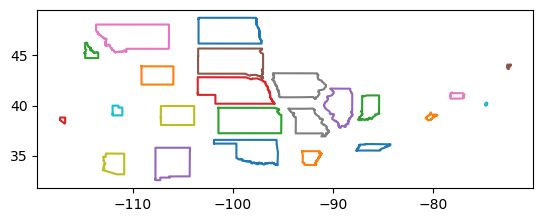

In [115]:
for i in range(len(new_coordinates)):
    curr_coords = new_coordinates[i]
    plt.plot(curr_coords[0], curr_coords[1])
    plt.gca().set_aspect("equal")